# NLP ANALYSIS: SUSTAINABILITY SOCIAL MEDIA POSTS

Climate conservation is a key factor in today's world. The burning of fossil fuels, deforestation, industrial processes contribute to pollution, by emitting carbon dioxide and greenhouse gases. These gases blanket the earth, trap the sun's heat, which ead to global warming and climate change. In the long run weather patterns change and disrupt the usual balance of nature, which become harmful to the humans, plants and animals. Therefore, the need to conserve the environment through various ways. 

With the age of technology, specifically social media, it has been easier to sensitize on sustainability measures. Conversations are held around different social media platforms and even online campaigns run.

This project looks at social media posts, the topics discussed and performs EDA and predictive modeling.

## 1. Data Understanding

This dataset, obtained from [kaggle](https://www.kaggle.com/datasets/pratyushpuri/global-climate-action-social-media-trends-2024-25/data),  contains social media posts related to sustainability and climate action across multiple platforms spanning from August 2024 to August 2025.
The following is a description of the columns:
- `post_id` - Unique identifier for each social media post.
- `user_id` - Anonymous unique identifier for the user who created the post.
- `username` - Anonymized username of the post creator.
- `post_date` - Date whn the post was published.
- `platform` - Social media platform used to post.
- `hashtag` - Primary hashtag used in the post.
- `post_text` - Full text content of the social media post.
- `engagement_likes` - Number of likes/reactions the post received.
- `engagement_shares` - Number of shares/retweets the post received.
- `engagement_comments` - Number of comments on the post.
- `user_followers` - Number of followers the user has.
- `user_location` - Geographic location of the user.
- `post_sentiment` - Sentiment classification of the post.
- `climate_topic` - Specifific climate/sustainability topic category.
- `call_to_action` - Specific action item or recommendation mentioned.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [4]:
data = pd.read_csv('sustainability_social_media_posts.csv')
data.head(3)

,post_id,user_id,username,post_date,platform,hashtag,post_text,engagement_likes,engagement_shares,engagement_comments,user_followers,user_location,post_sentiment,climate_topic,call_to_action
0,1,7dc6bf9d-15aa-42e3-87a7-42fe06eff6a7,earthloverstrike10649,2024-10-17,Facebook,#gogreen,Climate justice engages global citizens with c...,8318,1801,1362,821449,"Tokyo, Japan",Positive,Waste Reduction,Insulate your home effectively.
1,2,d5255db8-8737-4b4c-90cd-d46beb7b3b14,ecowarriorchain6514,2024-08-22,LinkedIn,#climatefinance,Green technology should be embraced through in...,8768,1079,220,1620578,"Stockholm, Sweden",Negative,Water Management,Choose clean power sources.
2,3,8d6fdb18-331f-4f55-b27c-4570378f012b,healthydominator9150,2024-09-01,LinkedIn,#climatehope2025,Clean energy builds a greener future in our da...,8683,1581,202,1405736,"Brussels, Belgium",Neutral,Sustainable Tourism,Switch to refillable containers.


In [5]:
#check the general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   post_id              3144 non-null   int64 
 1   user_id              3144 non-null   object
 2   username             3144 non-null   object
 3   post_date            3144 non-null   object
 4   platform             3144 non-null   object
 5   hashtag              3144 non-null   object
 6   post_text            3144 non-null   object
 7   engagement_likes     3144 non-null   int64 
 8   engagement_shares    3144 non-null   int64 
 9   engagement_comments  3144 non-null   int64 
 10  user_followers       3144 non-null   int64 
 11  user_location        3144 non-null   object
 12  post_sentiment       3144 non-null   object
 13  climate_topic        3144 non-null   object
 14  call_to_action       3144 non-null   object
dtypes: int64(5), object(10)
memory usage: 368.6+ KB


The dataset has 3144 entries and 15 columns. Its data types include integer and object.

## 2. Data cleaning

In [6]:
#check for missing values
data.isnull().sum()

post_id                0
user_id                0
username               0
post_date              0
platform               0
hashtag                0
post_text              0
engagement_likes       0
engagement_shares      0
engagement_comments    0
user_followers         0
user_location          0
post_sentiment         0
climate_topic          0
call_to_action         0
dtype: int64

In [7]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
#drop unnecessary columns
data = data.drop(columns=['post_id', 'user_id', 'username'])
data.head(3)

,post_date,platform,hashtag,post_text,engagement_likes,engagement_shares,engagement_comments,user_followers,user_location,post_sentiment,climate_topic,call_to_action
0,2024-10-17,Facebook,#gogreen,Climate justice engages global citizens with c...,8318,1801,1362,821449,"Tokyo, Japan",Positive,Waste Reduction,Insulate your home effectively.
1,2024-08-22,LinkedIn,#climatefinance,Green technology should be embraced through in...,8768,1079,220,1620578,"Stockholm, Sweden",Negative,Water Management,Choose clean power sources.
2,2024-09-01,LinkedIn,#climatehope2025,Clean energy builds a greener future in our da...,8683,1581,202,1405736,"Brussels, Belgium",Neutral,Sustainable Tourism,Switch to refillable containers.


In [9]:
#create new columns of month and year from the 'post_date' column
data['post_date'] = pd.to_datetime(data['post_date'])
data['post_month'] = data['post_date'].dt.month
data['post_year'] = data['post_date'].dt.year

#check the new columns
data.head(3)

,post_date,platform,hashtag,post_text,engagement_likes,engagement_shares,engagement_comments,user_followers,user_location,post_sentiment,climate_topic,call_to_action,post_month,post_year
0,2024-10-17,Facebook,#gogreen,Climate justice engages global citizens with c...,8318,1801,1362,821449,"Tokyo, Japan",Positive,Waste Reduction,Insulate your home effectively.,10,2024
1,2024-08-22,LinkedIn,#climatefinance,Green technology should be embraced through in...,8768,1079,220,1620578,"Stockholm, Sweden",Negative,Water Management,Choose clean power sources.,8,2024
2,2024-09-01,LinkedIn,#climatehope2025,Clean energy builds a greener future in our da...,8683,1581,202,1405736,"Brussels, Belgium",Neutral,Sustainable Tourism,Switch to refillable containers.,9,2024


### 2.1 Cleaning text data

Lowercasing

In [10]:
data['text'] = data['post_text'].str.lower()
data.head(3)

,post_date,platform,hashtag,post_text,engagement_likes,engagement_shares,engagement_comments,user_followers,user_location,post_sentiment,climate_topic,call_to_action,post_month,post_year,text
0,2024-10-17,Facebook,#gogreen,Climate justice engages global citizens with c...,8318,1801,1362,821449,"Tokyo, Japan",Positive,Waste Reduction,Insulate your home effectively.,10,2024,climate justice engages global citizens with c...
1,2024-08-22,LinkedIn,#climatefinance,Green technology should be embraced through in...,8768,1079,220,1620578,"Stockholm, Sweden",Negative,Water Management,Choose clean power sources.,8,2024,green technology should be embraced through in...
2,2024-09-01,LinkedIn,#climatehope2025,Clean energy builds a greener future in our da...,8683,1581,202,1405736,"Brussels, Belgium",Neutral,Sustainable Tourism,Switch to refillable containers.,9,2024,clean energy builds a greener future in our da...


Remove Noise

In [11]:
import re
import string
import contractions

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Expand contractions
    text = contractions.fix(text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text
data['text'] = data['text'].apply(clean_text)

#compare
data[['post_text', 'text']].head(3)

,post_text,text
0,Climate justice engages global citizens with c...,climate justice engages global citizens with c...
1,Green technology should be embraced through in...,green technology should be embraced through in...
2,Clean energy builds a greener future in our da...,clean energy builds a greener future in our da...


Tokenization

In [12]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

data['text'] = data['text'].apply(word_tokenize)

data[['post_text', 'text']].head(3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,post_text,text
0,Climate justice engages global citizens with c...,"[climate, justice, engages, global, citizens, ..."
1,Green technology should be embraced through in...,"[green, technology, should, be, embraced, thro..."
2,Clean energy builds a greener future in our da...,"[clean, energy, builds, a, greener, future, in..."


Stopword removal

In [13]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

data['text'] = data['text'].apply(lambda x:[word for word in x if word not in stop_words])
data[['post_text', 'text']].head(3)

,post_text,text
0,Climate justice engages global citizens with c...,"[climate, justice, engages, global, citizens, ..."
1,Green technology should be embraced through in...,"[green, technology, embraced, innovation, biod..."
2,Clean energy builds a greener future in our da...,"[clean, energy, builds, greener, future, daily..."


Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word)for word in x])
data[['post_text', 'text']].head(3)

,post_text,text
0,Climate justice engages global citizens with c...,"[climate, justice, engages, global, citizen, c..."
1,Green technology should be embraced through in...,"[green, technology, embraced, innovation, biod..."
2,Clean energy builds a greener future in our da...,"[clean, energy, build, greener, future, daily,..."


In [15]:
#join the text column back to a single string
data['final_text'] = data['text'].apply(lambda x: ' '.join(x))
data[['post_text', 'text', 'final_text']].head(3)

,post_text,text,final_text
0,Climate justice engages global citizens with c...,"[climate, justice, engages, global, citizen, c...",climate justice engages global citizen collect...
1,Green technology should be embraced through in...,"[green, technology, embraced, innovation, biod...",green technology embraced innovation biodivers...
2,Clean energy builds a greener future in our da...,"[clean, energy, build, greener, future, daily,...",clean energy build greener future daily life e...


## 3. EDA

### 3.1 Platform distribution

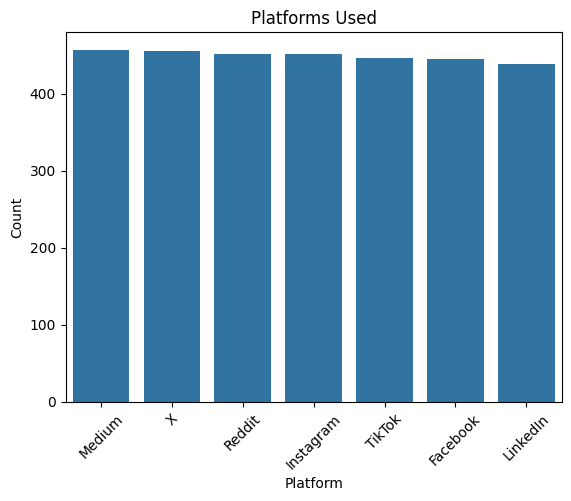

In [16]:
platform_counts = data['platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Platforms Used')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


There's a fair distribution in the platforms used to post.

### 3.2 Hashtags Distribution

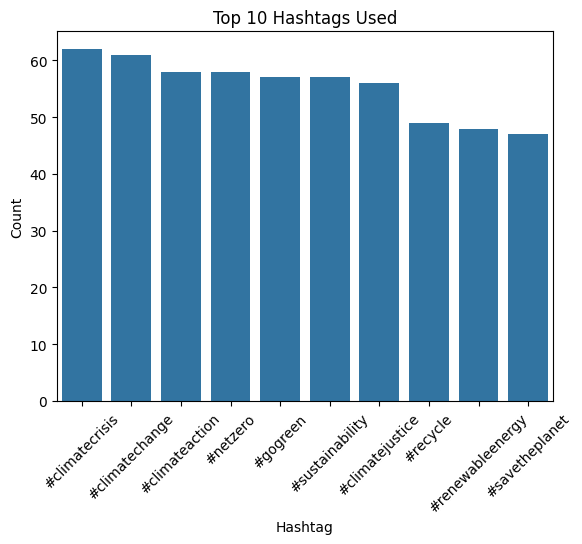

In [17]:
#top 10 hashtags used in the posts
hashtags = data['hashtag'].value_counts().head(10)
sns.barplot(x=hashtags.index, y=hashtags.values)
plt.title('Top 10 Hashtags Used')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3.3 User locations

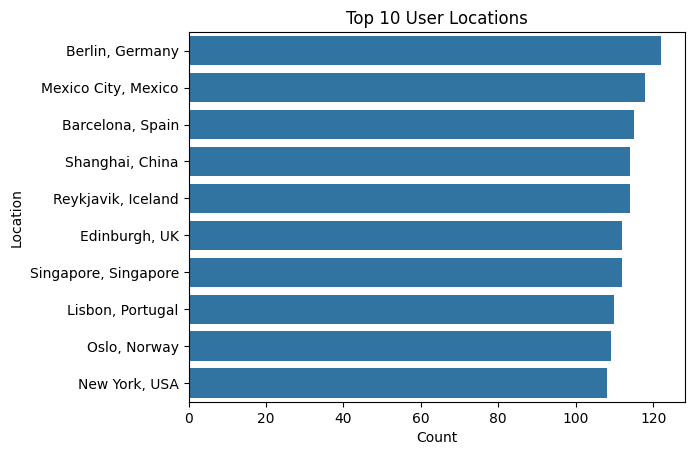

In [18]:
#top 10 user locations
locations = data['user_location'].value_counts().head(10)
sns.barplot(x=locations.values, y=locations.index)
plt.title('Top 10 User Locations')
plt.ylabel('Location')
plt.xlabel('Count')
plt.show()

### 3.4 Sentiment Distribution

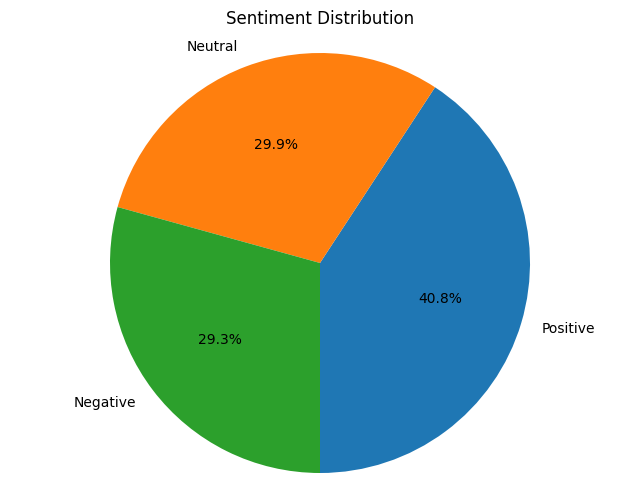

In [19]:
#check the sentiment distribution
sentiment_counts = data['post_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=270)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

### 3.5 Climate Topics

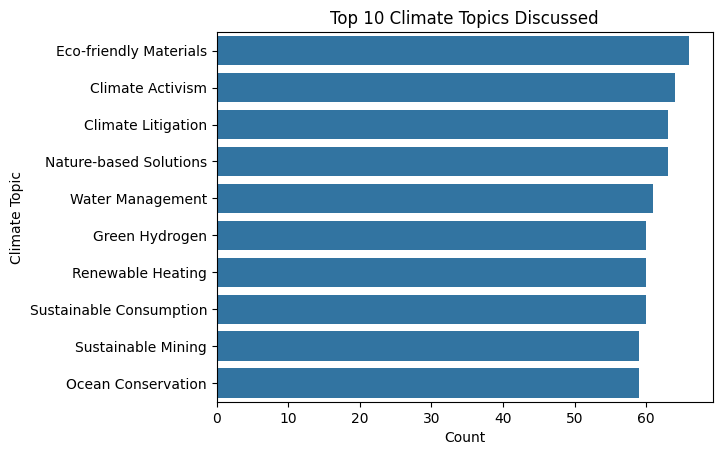

In [20]:
#top 10 climate topics discussed
topics = data['climate_topic'].value_counts().head(10)
sns.barplot(y=topics.index, x=topics.values)
plt.title('Top 10 Climate Topics Discussed')
plt.xlabel('Count')
plt.ylabel('Climate Topic')
plt.show()

### 3.6 Posts by Months

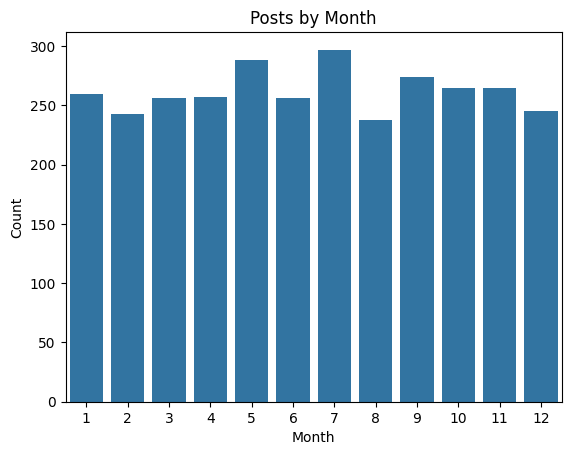

In [21]:
#monthly distribution of posts
months = data['post_month'].value_counts()
sns.barplot(x=months.index, y=months.values)
plt.title('Posts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

### 3.7 Posts by Year

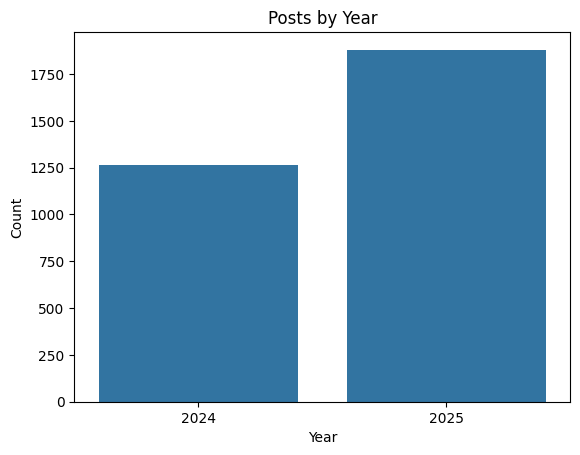

In [22]:
#yearly distribution of posts
yearly_counts = data['post_year'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Posts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### 3.8 Word Cloud

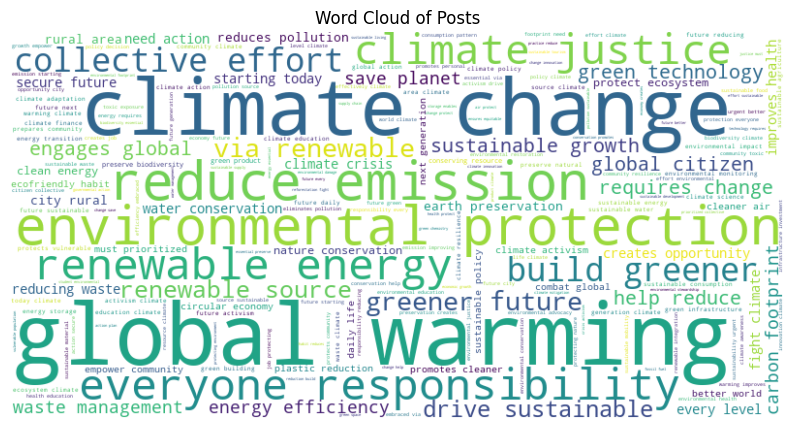

In [23]:
import wordcloud
# Generate a word cloud for the most common words in the posts
wordcloud_text = ' '.join(data['final_text'])
wordcloud_image = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Posts')
plt.show()

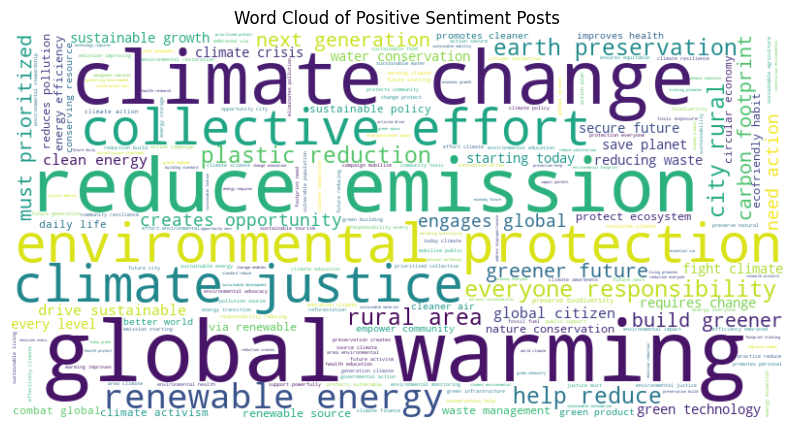

In [24]:
#word cloud for positve sentiment posts
positive = data[data['post_sentiment'] == 'Positive']
positive_text = ' '.join(positive['final_text'])
positive_wordcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Posts')
plt.show()

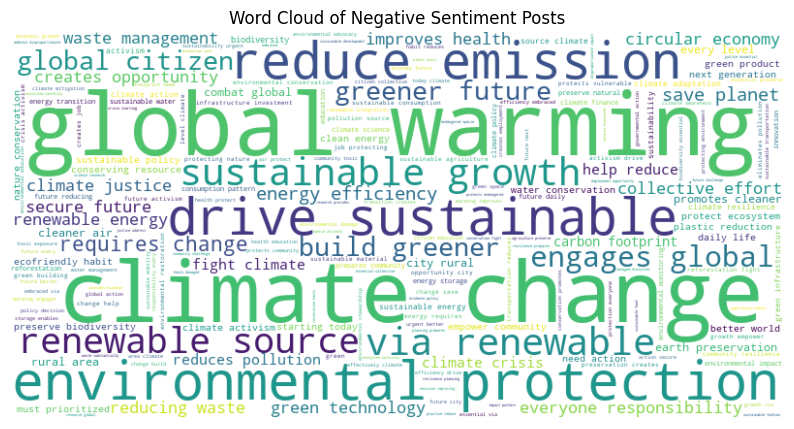

In [25]:
#wordcloud for negative sentiment posts
negative = data[data['post_sentiment'] == 'Negative']
negative_text = ' '.join(negative['final_text'])
negative_wordcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Posts')
plt.show()

### 3.9 Bigram Analysis

In [26]:
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder

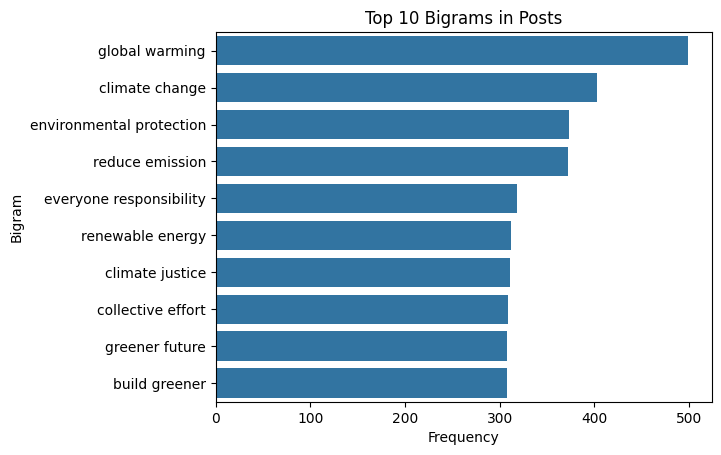

In [27]:
#find the most common bigrams in the posts
bigram_finder = BigramCollocationFinder.from_words(data['final_text'].str.cat(sep=' ').split())
bigram_measures = BigramAssocMeasures()

#plot the top 10 bigrams
top_bigrams = bigram_finder.nbest(bigram_measures.pmi, 10)
bigram_freq = bigram_finder.ngram_fd.items()
bigram_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(10)
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df)
plt.title('Top 10 Bigrams in Posts')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()



## 4. Modeling

We'll build predictive models, where we predict whether a post has a positive, negative or neutral.
Our baseline model will be logistic regression, then we'll also use linear svc, random forest and xgboost, and see which model performs best.

First, we import the necessary libraries for modeling.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.pipeline import  make_pipeline

### 4.1 Logistic Regression

In [29]:
#convert 'sentiment' column to numerical values for modeling
data['sentiment'] = data['post_sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})

#define features and target variable
X = data[['engagement_comments', 'climate_topic', 'call_to_action', 'final_text']]
y = data['sentiment']

#define peprocessing and modeling pipeline
texts = ['climate_topic', 'call_to_action', 'final_text']
numericals = ['engagement_comments']

text_pipeline = make_pipeline(TfidfVectorizer(max_features=100, stop_words='english'))
preprocessor = ColumnTransformer(transformers=[
    ('climate_topic', text_pipeline, 'climate_topic'),
    ('call_to_action', text_pipeline, 'call_to_action'),
    ('final_text', text_pipeline, 'final_text'),
    ('num', StandardScaler(), numericals)
])

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

#fit the preprocessing pipeline on the training data and transform test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

#apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

#train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

#predict on the test set
y_pred = model.predict(X_test_transformed)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.3163751987281399
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.30      0.29       181
           1       0.42      0.35      0.38       268
           2       0.25      0.28      0.26       180

    accuracy                           0.32       629
   macro avg       0.31      0.31      0.31       629
weighted avg       0.33      0.32      0.32       629



### 4.2 Linear SVC

In [30]:
#build pipeline
pipeline_svc = Pipeline(steps=[('classifier', LinearSVC())])

#hyperparameter tuning
param_grid_svc = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__max_iter': [1000, 2000, 3000]
}

#grid search
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_svc.fit(X_train_resampled, y_train_resampled)

#best parameters
print("Best parameters for SVC:", grid_search_svc.best_params_)

#predict on the test set
y_pred_svc = grid_search_svc.predict(X_test_transformed)
#evaluate the model
print('Classification report for SVC:')
print(classification_report(y_test, y_pred_svc))

Best parameters for SVC: {'classifier__C': 10, 'classifier__max_iter': 1000}
Classification report for SVC:
              precision    recall  f1-score   support

           0       0.27      0.28      0.27       181
           1       0.42      0.37      0.40       268
           2       0.25      0.28      0.26       180

    accuracy                           0.32       629
   macro avg       0.31      0.31      0.31       629
weighted avg       0.33      0.32      0.32       629



### 4.3 XG Boost

In [31]:
#hyperparameter tuning for XGB
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [ 0.1, 0.2],
    'max_depth': [ 5, 7],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0.1, 0.2],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [1, 2]}

xgb = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'auc',
    use_label_encoder = False,
    random_state = 42
)

grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid= param_grid_xgb,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_resampled, y_train_resampled)
print("Best parameters for XGB:", grid_search_xgb.best_params_)
#predict on the test set
y_pred_xgb = grid_search_xgb.predict(X_test_transformed)
#evaluate the model
print('Classification report for XGB:')
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best parameters for XGB: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'colsample_bytree': 0.6, 'gamma': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'scale_pos_weight': 1, 'subsample': 0.8}
Classification report for XGB:
              precision    recall  f1-score   support

           0       0.27      0.27      0.27       181
           1       0.40      0.44      0.42       268
           2       0.26      0.22      0.24       180

    accuracy                           0.33       629
   macro avg       0.31      0.31      0.31       629
weighted avg       0.32      0.33      0.33       629



### 4.4. Random Forest

In [32]:
#hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid= param_grid_rf,
    scoring = 'accuracy',
    cv = 3,
    n_jobs = -1,
    verbose = 1
)

grid_search_rf.fit(X_train_resampled, y_train_resampled)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

#predict on the test set
y_pred_rf = grid_search_rf.predict(X_test_transformed)

#evaluate the model
print('Classification report for Random Forest:')
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters for Random Forest: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.30      0.23      0.26       181
           1       0.42      0.54      0.47       268
           2       0.32      0.27      0.30       180

    accuracy                           0.37       629
   macro avg       0.35      0.35      0.34       629
weighted avg       0.36      0.37      0.36       629



### 4.5 Model Evaluation

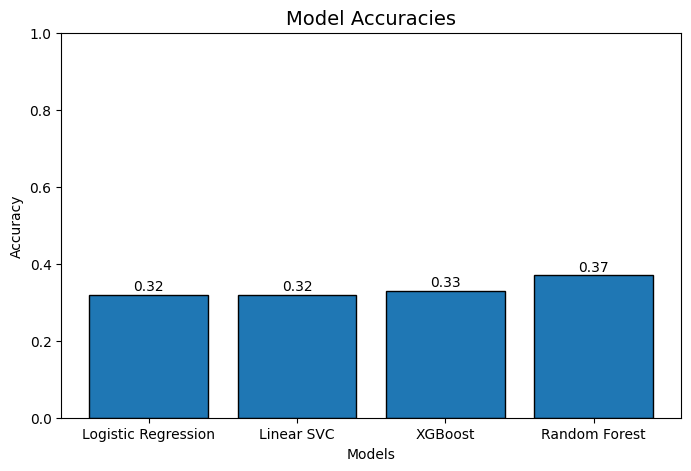

In [38]:
model_names = ["Logistic Regression",  "Linear SVC", "XGBoost", "Random Forest"]
accuracies = [0.32, 0.32, 0.33, 0.37]

# Create bar plot
plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, edgecolor='black')

# Add titles and labels
plt.title("Model Accuracies", fontsize=14)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # accuracy ranges between 0 and 1

# Add value labels on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()

## 5. Conclusion

- There's a fair distribution of platforms used to post.
- Most users from the dataset come from Europe.
- Most of the posts have a positive sentiment, meaning they're in favour of sustainability.
- Eco-friendly materials is the most discussed topic. Could be the users are campaigning for materials which do not pollute the environment. There is a need for recyclable materials.
- The models performed poorly, with accuracies less than 50%. Therefore there needs to be more data to improve the models' accuracy.